# Visualization 2

- Advanced visualization, example: https://trailsofwind.figures.cc/
- Custom visualization steps:
    - draw "patches" (shapes) on the screen (what):
        - lines
        - polygons
        - circle
        - text
    - location of the "patches" on the screen (where):
        - X & Y co-ordinate
        - "Coordinate Reference System (CRS)":
            - takes some X & Y and maps it on to actual space on screen
            - several CRS

### Transformers: let us pick a Coordinate Reference System (CRS)

- Documentation: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html
- `ax.transData`: default
- `ax.transAxes` and `fig.transFigure`:
    - (0, 0) is bottom left
    - (1, 1) is top right
        - these are true immaterial of the axes limits
- `None` or `IdentityTransform()`: disabling CRS

### Mix and match

- `ax.transData.transform((x, y))`: converts axes / data coords into raw coordinates
- How to draw an arrow:
    `matplotlib.patches.FancyArrowPatch((<x1>, <y1>), (<x2>, (<y2>)), transform=None, arrowstyle=<STYLE>)`:
        - arrowstyle="simple,head_width=10,head_length=10"

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

# new import statements
import geopandas as gpd

from shapely.geometry import Point, Polygon, box

396.7008101851851 211.8611111111111


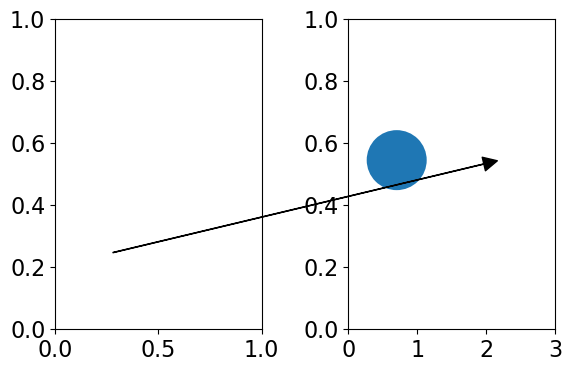

In [9]:
# GOAL: draw a visual circle at axes / data coords 0.5, 0.5 
# with raw co-ordinate radius 30 on right subplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 4))
ax2.set_xlim(0, 3)

# crop now (after .transform, we don't want to move anything!)
plt.tight_layout() 

x, y = ax2.transData.transform((0.5, 0.5))
print(x, y)
# Draw a circle at (x, y) with radius 30 and set transform to None
c = plt.Circle((x, y), 30, transform=None)
ax2.add_artist(c)

# GOAL: arrow from 0.2, 0.2 (left) to 2, 0.5 (right)
# Use axes / data coords from one subplot to another subplot
x1, y1 = ax1.transData.transform((0.2, 0.2))
x2, y2 = ax2.transData.transform((2, 0.5))
# arrowstyle="simple,head_width=10,head_length=10"
arrow = matplotlib.patches.FancyArrowPatch((x1, y1), (x2, y2), transform=None, color="k",
                                           arrowstyle="simple,head_width=10,head_length=10")
fig.add_artist(arrow)

### Custom Scatter Plots with Angles

In [10]:
df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])
df

,x,y,a
0,2,5,90
1,3,1,0
2,6,6,45
3,8,1,180


2 5 90
3 1 0
6 6 45
8 1 180


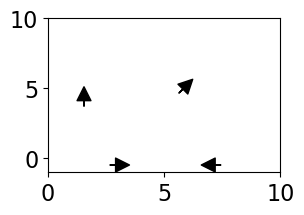

In [12]:
fig, ax = plt.subplots(figsize=(3,2))
ax.set_xlim(0, 10)
ax.set_ylim(-1, 10)

for row in df.itertuples():
    print(row.x, row.y, row.a)
    # v1: draw a circle for each scatter point
    
    # x, y = ax.transData.transform((row.x, row.y))
    # c = plt.Circle((x,y), radius=10, transform=None)
    # ax.add_artist(c)
    
    # v2: draw an arrow for each scatter point (correct angle)
    x, y = ax.transData.transform((row.x, row.y))
    # Calculate angle: math.radians(row.a)
    a = math.radians(row.a)
    # Calculate end axes / data coords using 
    x_diff = math.cos(a) * 25
    y_diff = math.sin(a) * 25
    c = matplotlib.patches.FancyArrowPatch((x,y), (x+x_diff, y+y_diff),transform=None, color="k",
                                           arrowstyle="simple,head_width=10,head_length=10")
    ax.add_artist(c)

### Plot annotations

- Target plot:
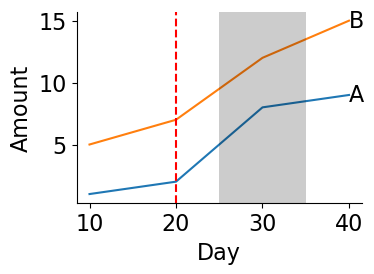

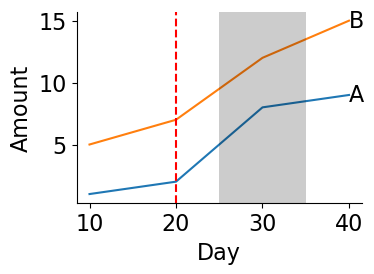

In [5]:
plt.rcParams["font.size"] = 16
df = pd.DataFrame({"A": [1,2,8,9], "B": [5,7,12,15]}, index=[10,20,30,40])
ax = df.plot.line(figsize=(4,3), legend=False)
ax.set_xlabel("Day")
ax.set_ylabel("Amount")
plt.tight_layout()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 1. Replace legened with line labels
for col in df.columns:
    ax.text(df.index[-1], df[col].iat[-1], col, ha="left", va="center")

# 2. Draw a vertical line at x=20
p = plt.Line2D((20, 20), ax.get_ylim(), color="r", linestyle="--")
ax.add_artist(p)

#(x1,y1), (x2,y2)   # FancyArrowPatch
#(x1,x2), (y1,y2)   # Line2D

# 3. Highlight a region from x=25 to x=35
p = plt.Rectangle((25, 0), 10, ax.get_ylim()[1], color="k", zorder=50, alpha=0.2, linewidth=0)
ax.add_artist(p)

# (x,y), width, height   --- Rectangle
# (x1,y1), (x2,y2)       --- later

### Geographic Data / Maps

- `.shp` => Shapefile

'/Users/msyamkumar/opt/anaconda3/lib/python3.9/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [ ]:
!ls /home/msyamkumar/.local/lib/python3.10/site-packages/geopandas/datasets/naturalearth_lowres

In [ ]:
!ls /home/msyamkumar/.local/lib/python3.10/site-packages/geopandas/datasets

In [ ]:
path = gpd.datasets.get_path("naturalearth_lowres")
gdf = gpd.read_file(path).set_index("name")

In [ ]:
gdf.head()

In [ ]:
type(gdf).__mro__

In [ ]:
df["geometry"]

In [ ]:
type(df["geometry"]).__mro__

In [ ]:
df["geometry"].iat[0]

In [ ]:
df["geometry"].iat[1]

In [ ]:
df.at["United States of America", "geometry"]

In [ ]:
print(type(df["geometry"].iat[1]))
print(type(df.at["United States of America", "geometry"]))

In [ ]:
ax = df.plot(figsize=(8,4))
ax.set_axis_off()

In [ ]:
ax = df.plot(figsize=(8,4), facecolor="0.7", edgecolor="black")
ax.set_axis_off()

In [ ]:
ax = df.plot(figsize=(8,4), column="pop_est", legend=True, cmap="cool")
ax.set_axis_off()

In [ ]:
# create a map where countries with >100M people are red, others are gray
df["color"] = "lightgray"
df.loc[df["pop_est"] > 1e8, "color"] = "red"
ax = df.plot(figsize=(8,4), color=df["color"])
ax.set_axis_off()

### Shapely shapes

In [ ]:
p1 = Polygon([(0,0), (1.2,1), (2,0)])   # triangle
p2 = box(0,0,1,1)
p3 = Point(5,5)
p4 = p3.buffer(1)
p4

In [ ]:
p1.union(p2)   # any point that is in either (OR)

In [ ]:
p1.intersection(p2)   # any point that is in both (AND)

In [ ]:
p1.difference(p2)   # subtraction

In [ ]:
p2.difference(p1)   # subtraction

In [ ]:
p1.intersects(p2) # do they overlap?

In [ ]:
# is the point "near" (<6 units) the triangle?
p1.union(p3.buffer(6))

In [ ]:
p1.intersects(p3.buffer(6))

In [ ]:
b = box(-10.67,34.5,31.55,71.05)

# attempt 1
df[df.intersects(b)].plot()

In [ ]:
eur1 = df.intersection(b)
eur1.plot()

In [ ]:
eur2 = eur1[~eur1.is_empty]
eur2

In [ ]:
eur2.plot()